<a href="https://colab.research.google.com/github/FGalvao77/Machine-Learning/blob/main/06_Introdu%C3%A7%C3%A3o_%C3%A0_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Logística**

A `regressão logística` é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

A regressão logística é amplamente usada em **ciências médicas e sociais**, e tem outras denominações, como `modelo logístico`, `modelo logit`, e `classificador de máxima entropia`. A regressão logística é utilizada em áreas como as seguintes:

- Em medicina, permite por exemplo determinar os factores que caracterizam um grupo de indivíduos doentes em relação a indivíduos sãos.
- No domínio dos seguros, permite encontrar fracções da clientela que sejam sensíveis a determinada política securitária em relação a um dado risco particular.
- Em instituições financeiras, pode detectar os grupos de risco para a subscrição de um crédito.
- Em econometria, permite explicar uma variável discreta, como por exemplo as intenções de voto em actos eleitorais.

O êxito da regressão logística assenta sobretudo nas numerosas ferramentas que permitem interpretar de modo aprofundado os resultados obtidos.

Em comparação com as técnicas conhecidas em **regressão**, em especial a `regressão linear`, a _regressão logística distingue-se essencialmente pelo facto de a variável resposta ser categórica_.

Enquanto método de predição para variáveis categóricas, a `regressão logística` é comparável às técnicas supervisionadas propostas em aprendizagem automática (árvores de decisão, redes neurais, etc.), ou ainda a análise discriminante preditiva em estatística exploratória. É possível de as colocar em concorrência para escolha do modelo mais adaptado para um certo problema preditivo a resolver.

Trata-se de um modelo de regressão para variáveis dependentes ou de resposta binomialmente distribuídas. É útil para modelar a probabilidade de um evento ocorrer como função de outros factores. É um modelo linear generalizado que usa como função de ligação a `função logit`.

- fonte:
  - Wikipedia: https://bit.ly/35vd5d3

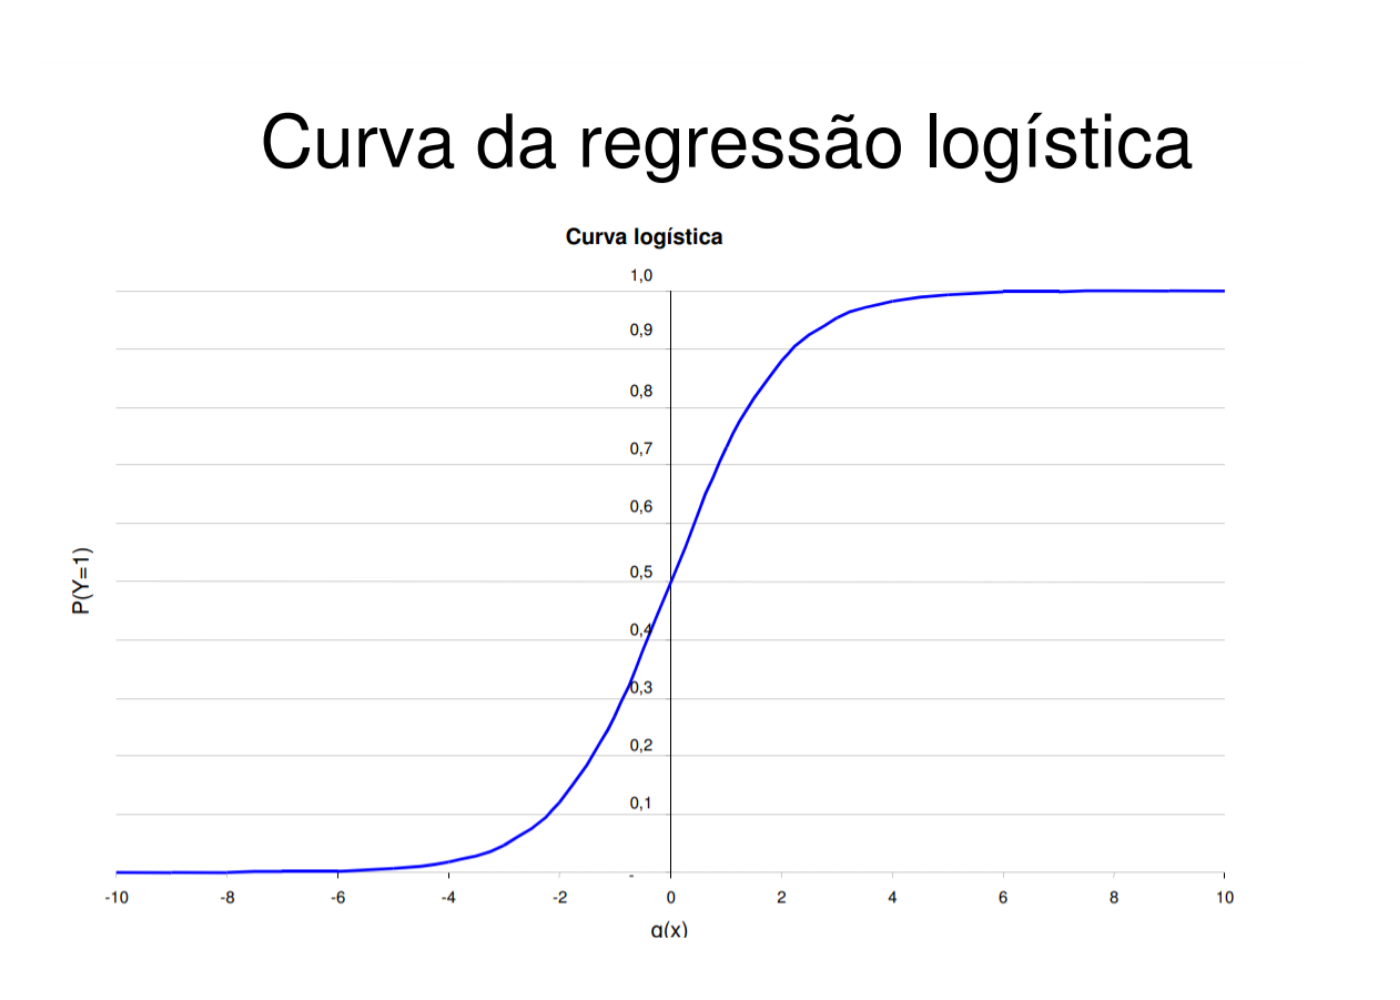

Saiba mais em:
  - e-Disciplinas (USP): https://bit.ly/3gukoqr
  - SCielo: https://bit.ly/3pMlbqU
  - IME (UNICAMP): https://bit.ly/3gq3gDv

**Vamos pra prática!**

## **Análise Exploratória dos Dados e Visualização Gráfica**

In [1]:
# importando as bibliotecas necessárias
import pandas as pd                # para modelagem de dados
import numpy as np                 # para recursos matemáticos e matrizes
import matplotlib.pyplot as plt    # para gerar visualizações gráficas

# comando "mágico" para renderizar a visualização gráfica
%matplotlib inline

# para ignorar mensagens de erros
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importando a base de dados para o google colab
# utilizando a biblioteca fornecida pela google
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
# realizando a leitura da base de dados
# instanciando o arquivo na variável "df"
df = pd.read_csv('diabetes.csv')

# visualizando as 10 primeiras linhas
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


> ***Para fins didáticos e melhor entendimento da apresentação dos dados, irei traduzir o nome das colunas***

In [26]:
# visualizando o nome das colunas
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Dicionário de dados:**

- `Pregnancies` – gravidez (quantidade de vez que a paciente ficou grávida)
- `Glucose` – glicose (nível de concentração de glicose)
- `BloodPressure` – pressao_sanguinea
- `SkinThickness` – espessura_pele
- `Insulin` – insulina (nível de insulina)
- `BMI` – IMC (índice de massa corporal)
- `DiabetesPedigreeFunction` – nivel_probabilidade (com base no histórico familiar)
- `Age` – idade
- `Outcome` – resultado

In [41]:
# criando uma lista com o nome "colunas_traduzidas"
colunas_traduzidas = ['gravidez', 'glicose', 'pressao_sanguinea', 'espessura_pele', 
                      'insulina', 'IMC', 'nivel_probabilidade', 'idade',
                      'resultado']

In [42]:
# instanciando novamente o arquivo 
# e passando como argumento da função "names" a lista "colunas_traduzidas"
df = pd.read_csv('diabetes.csv', 
                 names = colunas_traduzidas,
                 skiprows = 1)

df.head(10) # visualizando as 10 primeiras linhas

,gravidez,glicose,pressao_sanguinea,espessura_pele,insulina,IMC,nivel_probabilidade,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [43]:
# visualizando a quantidade de linhas e colunas
df.shape

(768, 9)

In [44]:
# visualizando o tipo de dado nas colunas
df.dtypes

gravidez                 int64
glicose                  int64
pressao_sanguinea        int64
espessura_pele           int64
insulina                 int64
IMC                    float64
nivel_probabilidade    float64
idade                    int64
resultado                int64
dtype: object

In [45]:
# informações estatísticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gravidez,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glicose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressao_sanguinea,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
espessura_pele,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulina,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
IMC,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
nivel_probabilidade,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
idade,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
resultado,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [46]:
# visualizando os valores únicos da coluna idade
df['idade'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [47]:
# a menor idade presente na coluna idade
df.idade.min()

21

In [48]:
# a maior idade presente na coluna idade
df['idade'].max()

81

In [56]:
# a idade mais presente no dataset
df.idade.mode()

0    22
dtype: int64

In [57]:
# visualizando as 10 idades mais presente no conjunto de dados
df.idade.value_counts().head(10)

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
Name: idade, dtype: int64

In [58]:
# visualizando as 10 idades menos presente no conjunto de dados
df.idade.value_counts().tail(10)

59    3
65    3
67    3
61    2
69    2
72    1
64    1
68    1
70    1
81    1
Name: idade, dtype: int64

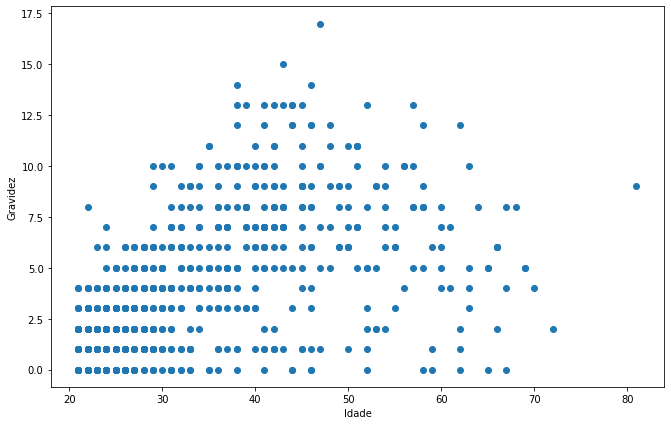

In [60]:
# gerando gráfico com os dados das colunas - "idade" X "gravidez"
plt.figure(figsize=(11,7))
plt.plot(df['idade'], df['gravidez'], 'o')
plt.xlabel('Idade')
plt.ylabel('Gravidez')
plt.show();

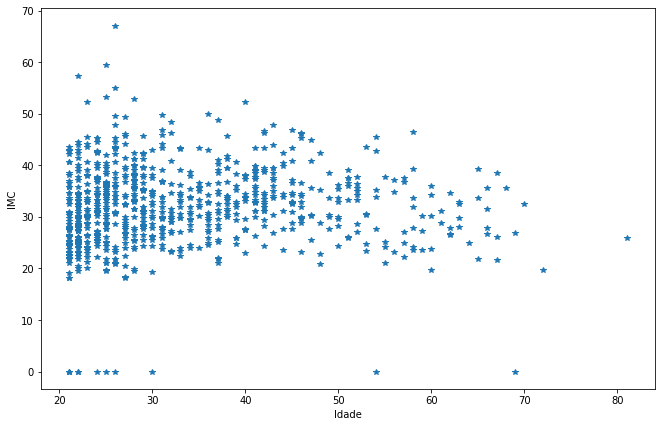

In [63]:
# gerando gráfico com os dados das colunas - "idade" X "IMC"
plt.figure(figsize=(11,7))
plt.plot(df['idade'], df['IMC'], '*')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.show();

## **Aplicando Técnicas de Aprendizagem de Máquina**

In [64]:
# instanciando a variável dependente
y = df['resultado']

In [66]:
# instanciando as variáveis independentes
X = df.drop('resultado', axis=1)

# visualizando as 5 primeiras linhas
X.head()

,gravidez,glicose,pressao_sanguinea,espessura_pele,insulina,IMC,nivel_probabilidade,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [67]:
# importando a biblioteca para realizar a separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

In [68]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3)

In [70]:
# importando a função para realizar a regressão logística
from sklearn.linear_model import LogisticRegression

In [72]:
# instanciando o modelo 
# passando como argumento o valor da iterações
model = LogisticRegression(max_iter=5000)

In [73]:
# treinando o modelo
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
# realizando as previsões
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [75]:
# importando a biblioteca para avaliar o modelo
from sklearn.metrics import accuracy_score

In [76]:
# validando o modelo
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.7619047619047619

> O modelo apresentou uma acurácia cerca de 76%.
  - ficou aquém do mínino esperado, portanto o modelo não é aplicável.